In [42]:
import numpy as np
import pandas as pd
import heapq
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_for_prior.csv')
people = data['people']
model = data['model']
num_rows = len(data)
TOTAL = 100000000* num_rows
S = 41 * 41

$$ y = \frac{|S|p_a}{|S|p_a+\sum_{r\in R}p(a|r)}$$ 
$$ people = \frac{S * prior}{S* prior + model}$$
$$ prior = \frac{people * model}{S * (1-people)}$$

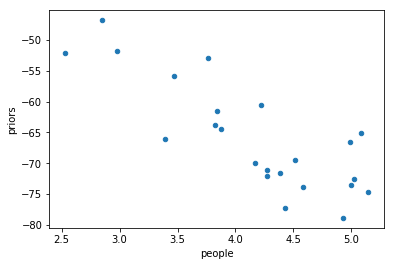

In [21]:
people_for_calc = people * 10
priors = (people_for_calc * model)/(S * (1- people_for_calc))
pearsonr(people, ((S *priors)/((S * priors) + model)))
data['priors'] = np.log((-1 * priors))

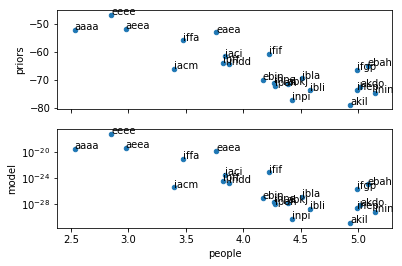

In [50]:
fig, ax = plt.subplots(2,sharex=True)
data.plot(x='people', y='priors',kind='scatter', ax=ax[0])
for row in data.iterrows():
    ax[0].annotate(row[1].filename, (row[1].people, row[1].priors))
data.plot(x='people', y='model', logy=True, kind='scatter', ax=ax[1])
for row in data.iterrows():
    ax[1].annotate(row[1].filename, (row[1].people, row[1].model))

In [82]:
def get_random_vector():
    l = np.random.randint(low=1, high = 100000000, size=(num_rows))
    l = np.true_divide(l, TOTAL)
    return l
def get_cor():
    prior = get_random_vector()
    res = (prior)/(prior + model)
    return (pearsonr(res, people)[0], prior)
(get_cor())

(0.15597351193348952,
 array([7.84450826e-03, 4.29929957e-03, 3.31327604e-02, 1.31685826e-03,
        4.09637217e-02, 1.85147826e-05, 1.34248891e-02, 3.29657204e-02,
        4.19002435e-02, 3.63713909e-02, 3.96633474e-02, 2.87667348e-03,
        3.98498409e-02, 2.18553930e-02, 5.17450348e-03, 8.69073826e-03,
        3.52217330e-02, 1.97138443e-02, 3.54925896e-02, 1.88963443e-02,
        4.07114535e-02, 3.23175087e-02, 8.79366261e-03]))

In [86]:
best_cors = [(0,[]),(0,[]),(0,[]),(0,[]),(0,[])]
min_best_cor = 0
for i in range(100000):
    cor, prior = get_cor()
    cor = abs(cor)
    if cor > min_best_cor:
        x = heapq.heappushpop(best_cors, (cor, str(prior)))[0]
#         print(x)
        min_best_cor = x


for x in best_cors:
	cor, prior = x
	print(cor)
	print(prior)

0.6165233004004165
[2.33182609e-05 8.71260652e-03 7.39482913e-03 2.79421283e-02
 9.23517435e-03 2.21742565e-02 2.40136770e-02 2.83653522e-02
 7.70099174e-03 2.30319239e-02 3.12824713e-02 1.09372483e-02
 2.02685826e-03 3.62948917e-02 1.14545374e-02 1.69292939e-02
 3.96826522e-04 3.74763413e-02 2.41379930e-02 3.46303643e-02
 3.24553478e-03 6.50566957e-03 1.28480930e-02]
0.6175291092935543
[2.11995652e-05 9.02958696e-04 1.27307739e-03 9.17199130e-04
 6.44657696e-03 3.19618570e-02 3.52044826e-02 2.66176122e-02
 4.65043391e-03 2.10453361e-02 1.81358248e-02 4.00353661e-02
 4.87458478e-03 1.63006991e-02 2.46722109e-02 3.75265057e-02
 3.14991530e-02 6.92493043e-03 3.37263452e-02 3.38004230e-02
 1.09093039e-02 2.18351696e-02 7.02131870e-03]
0.6760169968796683
[0.00012916 0.00177962 0.00026928 0.02406351 0.0258361  0.02360211
 0.0053372  0.03119524 0.04155434 0.03362413 0.03038681 0.02981931
 0.00434428 0.03653382 0.00965358 0.04346994 0.02394446 0.02644032
 0.01828073 0.00514267 0.04082997 0.02